# Import Library 

In [1]:
import fastf1
import fastf1.plotting
from fastf1.core import Laps
from fastf1.ergast import Ergast

import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from timple.timedelta import strftimedelta


In [2]:
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
#fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

# Get Qualifying and Race Session

In [ ]:
session_q = fastf1.get_session(2023, 'Bahrain', 'Q')
session_q.load()

In [ ]:
session_r = fastf1.get_session(2023, 'Bahrain', 'R')
session_r.load()

# Qualifying

In [5]:
drivers = pd.unique(session_q.laps['Driver'])
drivers

array(['VER', 'PER', 'LEC', 'SAI', 'ALO', 'RUS', 'HAM', 'STR', 'OCO',
       'HUL', 'NOR', 'BOT', 'ZHO', 'TSU', 'ALB', 'SAR', 'MAG', 'PIA',
       'DEV', 'GAS'], dtype=object)

In [6]:
session_q.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:27:20.459000,VER,1,NaT,1.0,1.0,0 days 00:18:59.843000,0 days 00:21:06.934000,NaT,NaT,...,True,Red Bull Racing,0 days 00:18:59.843000,2023-03-04 15:04:00.840,5,NaN,False,,False,False
1,0 days 00:29:32.394000,VER,1,NaT,2.0,2.0,0 days 00:27:20.459000,NaT,NaT,0 days 00:00:53.666000,...,False,Red Bull Racing,0 days 00:27:20.459000,2023-03-04 15:12:21.456,1,NaN,False,,False,False
2,0 days 00:31:03.689000,VER,1,0 days 00:01:31.295000,3.0,2.0,NaT,NaT,0 days 00:00:29.152000,0 days 00:00:39.195000,...,False,Red Bull Racing,0 days 00:29:32.394000,2023-03-04 15:14:33.391,1,NaN,False,,False,True
3,0 days 00:32:53.501000,VER,1,0 days 00:01:49.812000,4.0,2.0,NaT,0 days 00:32:51.749000,0 days 00:00:35.615000,0 days 00:00:44.953000,...,False,Red Bull Racing,0 days 00:31:03.689000,2023-03-04 15:16:04.686,1,NaN,False,,False,False
4,0 days 00:40:05.688000,VER,1,NaT,5.0,3.0,0 days 00:37:48.525000,NaT,NaT,0 days 00:00:53.390000,...,True,Red Bull Racing,0 days 00:32:53.501000,2023-03-04 15:17:54.498,1,NaN,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0 days 00:32:13.869000,GAS,10,0 days 00:01:32.181000,2.0,1.0,NaT,NaT,0 days 00:00:29.330000,0 days 00:00:39.764000,...,True,Alpine,0 days 00:30:41.688000,2023-03-04 15:15:42.685,1,NaN,False,,False,True
250,0 days 00:34:06.375000,GAS,10,0 days 00:01:52.506000,3.0,1.0,NaT,0 days 00:34:03.170000,0 days 00:00:33.458000,0 days 00:00:47.084000,...,True,Alpine,0 days 00:32:13.869000,2023-03-04 15:17:14.866,1,NaN,False,,False,False
251,0 days 00:39:15.464000,GAS,10,NaT,4.0,2.0,0 days 00:36:54.776000,NaT,NaT,0 days 00:00:54.291000,...,True,Alpine,0 days 00:34:06.375000,2023-03-04 15:19:07.372,1,NaN,False,,False,False
252,0 days 00:40:47.282000,GAS,10,0 days 00:01:31.818000,5.0,2.0,NaT,NaT,0 days 00:00:29.247000,0 days 00:00:39.412000,...,True,Alpine,0 days 00:39:15.464000,2023-03-04 15:24:16.461,1,NaN,True,TRACK LIMITS AT TURN 15 LAP 6,False,True


In [7]:
q_fastest_laps = list()

for drv in drivers:
    q_fastest = session_q.laps.pick_driver(drv).pick_fastest()
    q_fastest_laps.append(q_fastest)

In [8]:
q_fastest_lap_data = Laps(q_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)
q_fastest_lap_data.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [9]:
pole_lap = q_fastest_lap_data.pick_fastest()
pole_lap

q_fastest_lap_data['LapTimeDelta'] = q_fastest_lap_data['LapTime'] - pole_lap['LapTime']
q_fastest_lap_data

team_colors = list()
drivers = list()
lap_time_deltas = list()

for index, lap in q_fastest_lap_data.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)
    driver = lap['Driver']
    drivers.append(driver)
    lap_time_delta = lap['LapTimeDelta']
    lap_time_deltas.append(lap_time_delta)

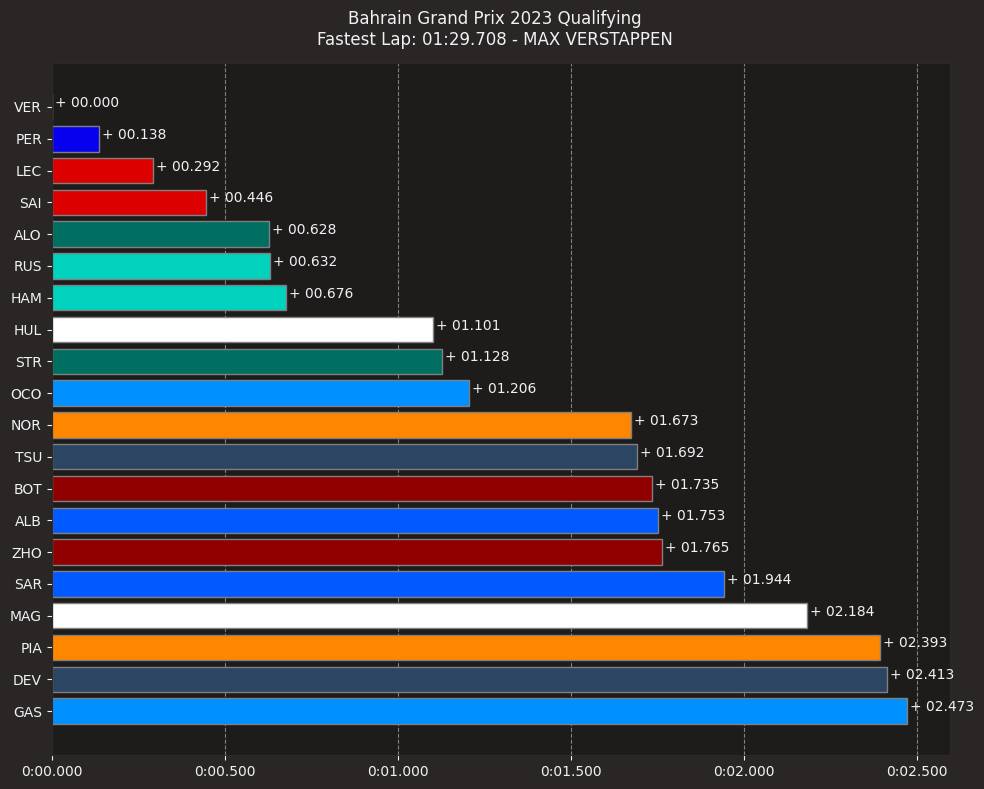

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.barh(q_fastest_lap_data.index, q_fastest_lap_data['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(q_fastest_lap_data.index)
ax.set_yticklabels(q_fastest_lap_data['Driver'])

i=0
for bar in bars:
    x = bar.get_x()
    y = bar.get_height()
    width = bar.get_width()
    plt.text(width+0.0000001, i  , f"+ {strftimedelta(lap_time_deltas[i], '%s.%ms')}")
    i+=1

ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='grey',  zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session_q.event['EventName']} {session_q.event.year} Qualifying\n" f"Fastest Lap: {lap_time_string} - {fastf1.plotting.DRIVER_TRANSLATE[pole_lap['Driver']].upper()}")

plt.tight_layout()
plt.show()

# Watchout :

- GAP 0.138 antara max dan perez
- GAP 0.048 dari P5-7 alonso russell hamilton
- GAP 0.092 dari P11-15 norris tsunoda bottas albon zhou

## Max vs Perez

In [ ]:
ver_lap = session_q.laps.pick_driver('VER').pick_fastest()
per_lap = session_q.laps.pick_driver('PER').pick_fastest()

ver_car = ver_lap.get_car_data().add_distance()
per_car = per_lap.get_car_data().add_distance()

ver_car2 = ver_lap.get_telemetry().add_distance()
per_car2 = per_lap.get_telemetry().add_distance()

In [ ]:
circuit_info = session_q.get_circuit_info()

circuit_info

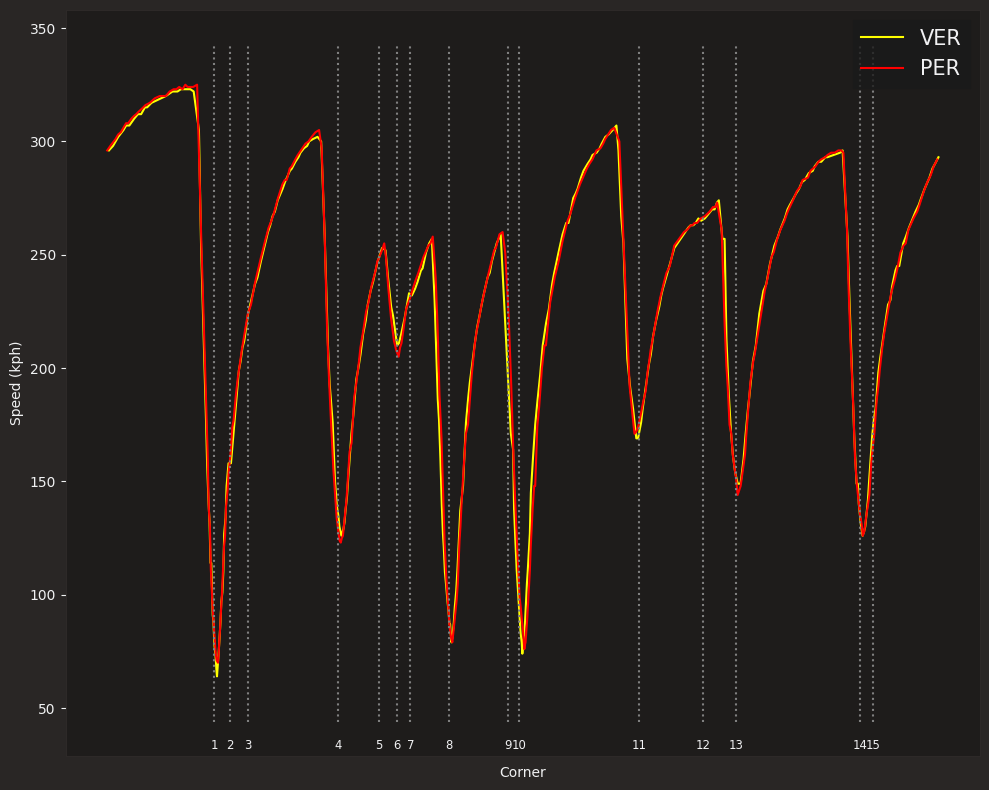

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(ver_car['Distance'], ver_car['Speed'], color='yellow', label='VER', linewidth=1.5)
ax.plot(per_car['Distance'], per_car['Speed'], color='red', label='PER', linewidth=1.5)

v_min = ver_car['Speed'].min()
v_max = ver_car['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center_baseline', ha='center', size='small')

ax.set_xlabel('Corner')
ax.set_ylabel('Speed (kph)')

# v_min = ver_car['Speed'].min()
# v_max = ver_car['Speed'].max()
# ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
#           linestyles='dotted', colors='grey')

# for _, corner in circuit_info.corners.iterrows():
#     txt = f"{corner['Number']}{corner['Letter']}"
#     ax.text(corner['Distance'], v_min-30, txt,
#             va='center_baseline', ha='center', size='medium')

# plt.grid(which='major', color='grey', axis='both')
plt.xticks([])
plt.minorticks_off()

ax.legend(bbox_to_anchor=(1, 1), fontsize=15)
plt.tight_layout()
plt.show()

## Insight:
- Perbedaan speed sangat tipis antara max dan per

In [14]:
ver_car2['Driver'] = 'VER'
per_car2['Driver'] = 'PER'

In [15]:
telemetry = pd.concat([ver_car2, per_car2])

In [16]:
num_minisectors = 25
total_distance = max(telemetry['Distance'])
minisector_length = total_distance/num_minisectors
minisector_length

214.71133333333316

In [17]:
minisectors = [0]
for i in range(0, (num_minisectors-1)):
    minisectors.append(minisector_length * (i+1))
    
minisectors

[0,
 214.71133333333316,
 429.4226666666663,
 644.1339999999994,
 858.8453333333326,
 1073.5566666666657,
 1288.267999999999,
 1502.979333333332,
 1717.6906666666653,
 1932.4019999999985,
 2147.1133333333314,
 2361.8246666666646,
 2576.535999999998,
 2791.247333333331,
 3005.958666666664,
 3220.6699999999973,
 3435.3813333333305,
 3650.0926666666637,
 3864.803999999997,
 4079.51533333333,
 4294.226666666663,
 4508.9379999999965,
 4723.649333333329,
 4938.360666666663,
 5153.071999999996]

In [18]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )

)
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector
2,2023-03-04 16:07:25.761,0 days 01:22:24.764000,,1396.081389,0 days 00:00:00,10647,293,7,100,False,12,interpolation,0.000004,OnTrack,-380,1264,-158,0.000000,VER,1
3,2023-03-04 16:07:25.858,0 days 01:22:24.861000,,1396.081389,0 days 00:00:00.097000,10623,294,7,100,False,12,pos,0.001483,OnTrack,-376,1366,-159,7.921667,VER,1
4,2023-03-04 16:07:26.056,0 days 01:22:25.059000,,1396.081389,0 days 00:00:00.295000,10575,296,8,100,False,12,car,0.004509,OnTrack,-363,1642,-159,24.201667,VER,1
5,2023-03-04 16:07:26.058,0 days 01:22:25.061000,,1396.081389,0 days 00:00:00.297000,10635,297,8,100,False,12,pos,0.004540,OnTrack,-363,1645,-159,24.366667,VER,1
6,2023-03-04 16:07:26.377,0 days 01:22:25.380000,31,1396.081389,0 days 00:00:00.616000,10695,298,8,100,False,12,car,0.009444,OnTrack,-354,1842,-158,50.772778,VER,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,2023-03-04 16:09:01.218,0 days 01:24:00.221000,1,442.563611,0 days 00:01:29.324000,11359,287,7,100,False,12,pos,0.989155,OnTrack,-397,938,-159,5325.709722,PER,25
658,2023-03-04 16:09:01.457,0 days 01:24:00.460000,1,439.430278,0 days 00:01:29.563000,11380,289,7,100,False,12,car,0.992725,OnTrack,-390,1062,-158,5344.896111,PER,25
659,2023-03-04 16:09:01.578,0 days 01:24:00.581000,1,435.696944,0 days 00:01:29.684000,11457,290,7,100,False,12,pos,0.994545,OnTrack,-387,1138,-159,5354.643333,PER,25
660,2023-03-04 16:09:01.737,0 days 01:24:00.740000,1,431.963611,0 days 00:01:29.843000,11534,292,7,100,False,12,car,0.996951,OnTrack,-381,1260,-159,5367.540000,PER,25


In [19]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,PER,304.809524
1,1,VER,303.055556
2,2,PER,318.388889
3,2,VER,316.857143
4,3,PER,313.578947
5,3,VER,299.421053
6,4,PER,118.148936
7,4,VER,110.687500
8,5,PER,232.782609
9,5,VER,233.291667


In [20]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'FastestDriver'})
fastest_driver

,Minisector,FastestDriver
0,1,PER
2,2,PER
4,3,PER
6,4,PER
9,5,VER
11,6,VER
12,7,PER
15,8,VER
17,9,VER
18,10,PER


In [21]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver
0,2023-03-04 16:07:25.761,0 days 01:22:24.764000,,1396.081389,0 days 00:00:00,10647,293,7,100,False,...,interpolation,0.000004,OnTrack,-380,1264,-158,0.000000,VER,1,PER
18,2023-03-04 16:07:31.894,0 days 01:22:30.897000,,536.787222,0 days 00:00:00,10799,294,7,100,False,...,interpolation,0.000108,OnTrack,-380,1237,-159,0.000000,PER,1,PER
1,2023-03-04 16:07:25.858,0 days 01:22:24.861000,,1396.081389,0 days 00:00:00.097000,10623,294,7,100,False,...,pos,0.001483,OnTrack,-376,1366,-159,7.921667,VER,1,PER
19,2023-03-04 16:07:32.056,0 days 01:22:31.059000,,536.787222,0 days 00:00:00.162000,10568,296,8,100,False,...,car,0.002593,OnTrack,-374,1397,-159,13.320000,PER,1,PER
20,2023-03-04 16:07:32.059,0 days 01:22:31.062000,,536.787222,0 days 00:00:00.165000,10611,296,8,100,False,...,pos,0.002639,OnTrack,-374,1401,-159,13.566667,PER,1,PER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,2023-03-04 16:09:01.578,0 days 01:24:00.581000,1,435.696944,0 days 00:01:29.684000,11457,290,7,100,False,...,pos,0.994545,OnTrack,-387,1138,-159,5354.643333,PER,25,VER
1292,2023-03-04 16:08:55.456,0 days 01:23:54.459000,31,986.300000,0 days 00:01:29.695000,11564,293,7,100,False,...,car,0.996348,OnTrack,-376,1366,-158,5362.659444,VER,25,VER
1293,2023-03-04 16:08:55.469,0 days 01:23:54.472000,31,986.300000,0 days 00:01:29.708000,11604,294,7,100,False,...,interpolation,0.996545,OnTrack,-375,1377,-157,5363.721111,VER,25,VER
1312,2023-03-04 16:09:01.737,0 days 01:24:00.740000,1,431.963611,0 days 00:01:29.843000,11534,292,7,100,False,...,car,0.996951,OnTrack,-381,1260,-159,5367.540000,PER,25,VER


In [22]:
telemetry.loc[telemetry['FastestDriver'] == 'VER', 'FastestDriverInt'] = 1
telemetry.loc[telemetry['FastestDriver'] == 'PER', 'FastestDriverInt'] = 2

In [23]:
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver,FastestDriverInt
0,2023-03-04 16:07:25.761,0 days 01:22:24.764000,,1396.081389,0 days 00:00:00,10647,293,7,100,False,...,0.000004,OnTrack,-380,1264,-158,0.000000,VER,1,PER,2.0
18,2023-03-04 16:07:31.894,0 days 01:22:30.897000,,536.787222,0 days 00:00:00,10799,294,7,100,False,...,0.000108,OnTrack,-380,1237,-159,0.000000,PER,1,PER,2.0
1,2023-03-04 16:07:25.858,0 days 01:22:24.861000,,1396.081389,0 days 00:00:00.097000,10623,294,7,100,False,...,0.001483,OnTrack,-376,1366,-159,7.921667,VER,1,PER,2.0
19,2023-03-04 16:07:32.056,0 days 01:22:31.059000,,536.787222,0 days 00:00:00.162000,10568,296,8,100,False,...,0.002593,OnTrack,-374,1397,-159,13.320000,PER,1,PER,2.0
20,2023-03-04 16:07:32.059,0 days 01:22:31.062000,,536.787222,0 days 00:00:00.165000,10611,296,8,100,False,...,0.002639,OnTrack,-374,1401,-159,13.566667,PER,1,PER,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,2023-03-04 16:09:01.578,0 days 01:24:00.581000,1,435.696944,0 days 00:01:29.684000,11457,290,7,100,False,...,0.994545,OnTrack,-387,1138,-159,5354.643333,PER,25,VER,1.0
1292,2023-03-04 16:08:55.456,0 days 01:23:54.459000,31,986.300000,0 days 00:01:29.695000,11564,293,7,100,False,...,0.996348,OnTrack,-376,1366,-158,5362.659444,VER,25,VER,1.0
1293,2023-03-04 16:08:55.469,0 days 01:23:54.472000,31,986.300000,0 days 00:01:29.708000,11604,294,7,100,False,...,0.996545,OnTrack,-375,1377,-157,5363.721111,VER,25,VER,1.0
1312,2023-03-04 16:09:01.737,0 days 01:24:00.740000,1,431.963611,0 days 00:01:29.843000,11534,292,7,100,False,...,0.996951,OnTrack,-381,1260,-159,5367.540000,PER,25,VER,1.0


In [24]:
# telemetry = telemetry.drop(['FastestDriverInt'], axis='columns')

In [25]:
condition = telemetry['FastestDriverInt'] == 1
count = len(telemetry[condition])

total_rows = len(telemetry)
percentage = (count/total_rows) * 100
percentage

48.02130898021309

22.632911392405063


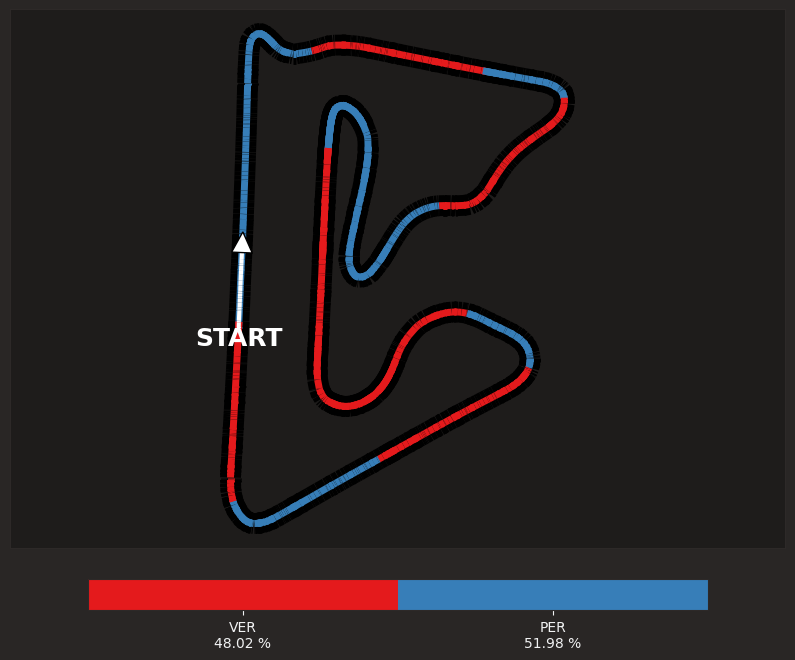

In [26]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['FastestDriverInt'].to_numpy().astype(float)

cmap = cm.get_cmap('Set1', 6)

lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

bg_track = LineCollection(segments)
bg_track.set_linewidth(15)
bg_track.set_color('black')

whiteline = LineCollection(segments[0:30])
whiteline.set_linewidth(3)
whiteline.set_color('white')

plt.rcParams['figure.figsize'] = [10, 10]

plt.gca().add_collection(bg_track)
plt.gca().add_collection(lc_comp)

plt.gca().add_collection(whiteline)

plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.text(x[0], y[0], 'START', fontsize=18, color='white', ha='center', va='top', weight='bold')

slope = (y[0] - y[30]) / (x[0] - x[30])
print(slope)
angle = np.arctan(slope)
angle_degrees = np.degrees(angle)
plt.arrow(x[30], y[30], 0.1 * np.cos(angle), 0.1 * np.sin(angle), head_width=500, head_length=500, fc='white', ec='black', zorder=2)


cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4), location='bottom', shrink=0.8, anchor=(0.5, 2))
cbar.set_ticks(np.arange(1.5, 3.5))
cbar.set_ticklabels([f"VER\n"f"{round(percentage, 2)} %", f"PER\n"f"{round(100-percentage, 2)} %"])

plt.show()

In [27]:
print(ver_lap[['Compound', 'FreshTyre', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife']])
print(per_lap[['Compound', 'FreshTyre', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife']])

Compound                         SOFT
FreshTyre                       False
Sector1Time    0 days 00:00:28.736000
Sector2Time    0 days 00:00:38.514000
Sector3Time    0 days 00:00:22.458000
TyreLife                          2.0
dtype: object
Compound                         SOFT
FreshTyre                       False
Sector1Time    0 days 00:00:28.723000
Sector2Time    0 days 00:00:38.537000
Sector3Time    0 days 00:00:22.586000
TyreLife                          2.0
dtype: object


## Insight:
- Max mendapat waktu tercepat walaupun hanya menguasai 48.02% bagian track
- Max lebih cepat pada saat exit corner
- Per yang lebih cepat pada saat entry corner
- Pada beberapa lurusan, max menguasai sebagian awal dari lurusan dan per menguasai bagian akhir dari lurusan hingga ke entry corner
- Sector 1: PER
- Sector 2: VER
- Sector 3: VER
- Sama sama memakai ban SOFT yang sudah dipakai sebanyak 2 laps
- Perez menguasai tikungan lambat, Verstappen menguasai tikungan cepat

# Alonso vs Russell vs Hamilton

In [ ]:
alo_lap = session_q.laps.pick_driver('ALO').pick_fastest()
rus_lap = session_q.laps.pick_driver('RUS').pick_fastest()
ham_lap = session_q.laps.pick_driver('HAM').pick_fastest()

alo_car = alo_lap.get_car_data().add_distance()
rus_car = rus_lap.get_car_data().add_distance()
ham_car = ham_lap.get_car_data().add_distance()

alo_car2 = alo_lap.get_telemetry().add_distance()
rus_car2 = rus_lap.get_telemetry().add_distance()
ham_car2 = ham_lap.get_telemetry().add_distance()

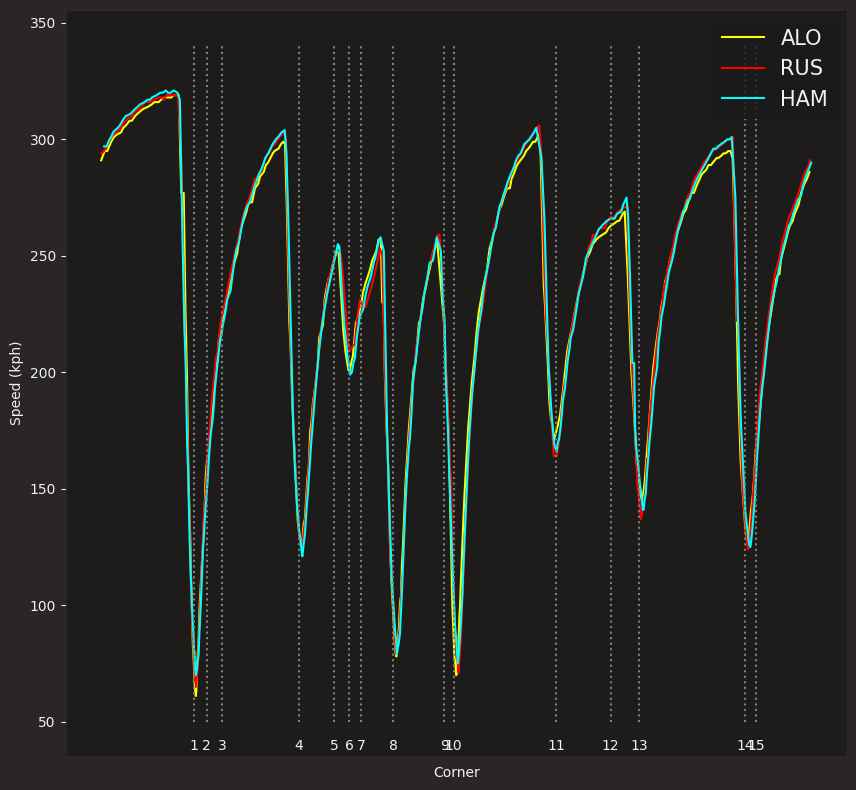

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(alo_car['Distance'], alo_car['Speed'], color='yellow', label='ALO', linewidth=1.5)
ax.plot(rus_car['Distance'], rus_car['Speed'], color='red', label='RUS', linewidth=1.5)
ax.plot(ham_car['Distance'], ham_car['Speed'], color='cyan', label='HAM', linewidth=1.5)

ax.set_xlabel('Corner')
ax.set_ylabel('Speed (kph)')

v_min = ham_car['Speed'].min()
v_max = ham_car['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center_baseline', ha='center', size='medium')

# plt.grid(which='major', color='grey', axis='both')
plt.xticks([])
plt.minorticks_off()

ax.legend(bbox_to_anchor=(1, 1), fontsize=15)
plt.tight_layout()
plt.show()

## Insight: 

- Alonso kalah top speed ketimbang duo mercedes di hampir seluruh lurusan panjang
- Alonso selalu kalah cepat pada beberapa corner di sebagian awal track (T1, T8, T10), namun selalu lebih cepat pada 4 slow corner di sebagian akhir track (T11, T13, T14, T15)
- Top speed russell dan hamilton berbeda tipis

In [30]:
alo_car2['Driver'] = 'ALO'
rus_car2['Driver'] = 'RUS'
ham_car2['Driver'] = 'HAM'

In [31]:
telemetry = pd.concat([alo_car2, rus_car2, ham_car2])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2023-03-04 16:03:21.773,0 days 01:18:20.776000,,192.550278,0 days 00:00:00,10690,290,8,99,False,12,interpolation,4.172163e-07,OnTrack,-378,1323,-158,0.000000,ALO
3,2023-03-04 16:03:21.855,0 days 01:18:20.858000,,192.550278,0 days 00:00:00.082000,10708,291,8,99,False,12,car,1.236027e-03,OnTrack,-376,1373,-159,6.628333,ALO
4,2023-03-04 16:03:21.979,0 days 01:18:20.982000,,192.550278,0 days 00:00:00.206000,10767,293,8,99,False,12,pos,3.118431e-03,OnTrack,-372,1460,-159,16.720556,ALO
5,2023-03-04 16:03:22.175,0 days 01:18:21.178000,18,192.550278,0 days 00:00:00.402000,10827,295,8,99,False,12,car,6.109917e-03,OnTrack,-364,1619,-158,32.781667,ALO
6,2023-03-04 16:03:22.179,0 days 01:18:21.182000,18,187.261389,0 days 00:00:00.406000,10848,295,8,99,False,12,pos,6.170851e-03,OnTrack,-364,1623,-159,33.109444,ALO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2023-03-04 16:05:25.178,0 days 01:20:24.181000,63,327.847222,0 days 00:01:29.995000,10592,288,8,100,False,12,pos,9.940101e-01,OnTrack,-397,947,-159,5342.972222,HAM
691,2023-03-04 16:05:25.336,0 days 01:20:24.339000,63,323.547222,0 days 00:01:30.153000,10630,290,8,100,False,12,car,9.963829e-01,OnTrack,-389,1080,-158,5355.700000,HAM
692,2023-03-04 16:05:25.399,0 days 01:20:24.402000,63,323.547222,0 days 00:01:30.216000,10670,290,8,100,False,12,pos,9.973309e-01,OnTrack,-386,1154,-158,5360.775000,HAM
693,2023-03-04 16:05:25.559,0 days 01:20:24.562000,63,323.547222,0 days 00:01:30.376000,10710,291,8,100,False,12,pos,9.997433e-01,OnTrack,-375,1397,-159,5373.708333,HAM


In [32]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )

)
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector
2,2023-03-04 16:03:21.773,0 days 01:18:20.776000,,192.550278,0 days 00:00:00,10690,290,8,99,False,12,interpolation,4.172163e-07,OnTrack,-378,1323,-158,0.000000,ALO,1
3,2023-03-04 16:03:21.855,0 days 01:18:20.858000,,192.550278,0 days 00:00:00.082000,10708,291,8,99,False,12,car,1.236027e-03,OnTrack,-376,1373,-159,6.628333,ALO,1
4,2023-03-04 16:03:21.979,0 days 01:18:20.982000,,192.550278,0 days 00:00:00.206000,10767,293,8,99,False,12,pos,3.118431e-03,OnTrack,-372,1460,-159,16.720556,ALO,1
5,2023-03-04 16:03:22.175,0 days 01:18:21.178000,18,192.550278,0 days 00:00:00.402000,10827,295,8,99,False,12,car,6.109917e-03,OnTrack,-364,1619,-158,32.781667,ALO,1
6,2023-03-04 16:03:22.179,0 days 01:18:21.182000,18,187.261389,0 days 00:00:00.406000,10848,295,8,99,False,12,pos,6.170851e-03,OnTrack,-364,1623,-159,33.109444,ALO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2023-03-04 16:05:25.178,0 days 01:20:24.181000,63,327.847222,0 days 00:01:29.995000,10592,288,8,100,False,12,pos,9.940101e-01,OnTrack,-397,947,-159,5342.972222,HAM,25
691,2023-03-04 16:05:25.336,0 days 01:20:24.339000,63,323.547222,0 days 00:01:30.153000,10630,290,8,100,False,12,car,9.963829e-01,OnTrack,-389,1080,-158,5355.700000,HAM,25
692,2023-03-04 16:05:25.399,0 days 01:20:24.402000,63,323.547222,0 days 00:01:30.216000,10670,290,8,100,False,12,pos,9.973309e-01,OnTrack,-386,1154,-158,5360.775000,HAM,25
693,2023-03-04 16:05:25.559,0 days 01:20:24.562000,63,323.547222,0 days 00:01:30.376000,10710,291,8,100,False,12,pos,9.997433e-01,OnTrack,-375,1397,-159,5373.708333,HAM,26


In [33]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,ALO,299.315789
1,1,HAM,301.700000
2,1,RUS,301.304348
3,2,ALO,312.100000
4,2,HAM,315.000000
...,...,...,...
72,25,ALO,271.500000
73,25,HAM,274.695652
74,25,RUS,275.476190
75,26,HAM,291.000000


In [34]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'FastestDriver'})
fastest_driver

,Minisector,FastestDriver
1,1,HAM
4,2,HAM
8,3,RUS
10,4,HAM
12,5,ALO
16,6,HAM
18,7,ALO
23,8,RUS
26,9,RUS
28,10,HAM


In [35]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver
0,2023-03-04 16:03:21.773,0 days 01:18:20.776000,,192.550278,0 days 00:00:00,10690,290,8,99,False,...,interpolation,4.172163e-07,OnTrack,-378,1323,-158,0.000000,ALO,1,HAM
19,2023-03-04 16:03:50.390,0 days 01:18:49.393000,,991.358889,0 days 00:00:00,10762,293,8,100,False,...,interpolation,8.694738e-06,OnTrack,-378,1276,-159,0.000000,RUS,1,HAM
42,2023-03-04 16:03:55.183,0 days 01:18:54.186000,,413.585556,0 days 00:00:00,10798,293,8,100,False,...,interpolation,2.854517e-05,OnTrack,-382,1264,-167,0.000000,HAM,1,HAM
1,2023-03-04 16:03:21.855,0 days 01:18:20.858000,,192.550278,0 days 00:00:00.082000,10708,291,8,99,False,...,car,1.236027e-03,OnTrack,-376,1373,-159,6.628333,ALO,1,HAM
20,2023-03-04 16:03:50.496,0 days 01:18:49.499000,,991.358889,0 days 00:00:00.106000,10791,294,8,100,False,...,car,1.618160e-03,OnTrack,-375,1363,-159,8.656667,RUS,1,HAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,2023-03-04 16:05:20.559,0 days 01:20:19.562000,27,804.434167,0 days 00:01:30.169000,10816,291,8,100,False,...,pos,9.955206e-01,OnTrack,-387,1130,-159,5367.311667,RUS,25,RUS
2089,2023-03-04 16:05:25.559,0 days 01:20:24.562000,63,323.547222,0 days 00:01:30.376000,10710,291,8,100,False,...,pos,9.997433e-01,OnTrack,-375,1397,-159,5373.708333,HAM,26,RUS
2090,2023-03-04 16:05:25.567,0 days 01:20:24.570000,63,323.547222,0 days 00:01:30.384000,10730,291,8,100,False,...,interpolation,9.998641e-01,OnTrack,-374,1407,-159,5374.355000,HAM,26,RUS
2087,2023-03-04 16:05:20.719,0 days 01:20:19.722000,27,804.434167,0 days 00:01:30.329000,10806,292,8,100,False,...,pos,9.979383e-01,OnTrack,-381,1260,-159,5380.289444,RUS,26,RUS


In [36]:
telemetry.loc[telemetry['FastestDriver'] == 'ALO', 'FastestDriverInt'] = 1
telemetry.loc[telemetry['FastestDriver'] == 'RUS', 'FastestDriverInt'] = 2
telemetry.loc[telemetry['FastestDriver'] == 'HAM', 'FastestDriverInt'] = 3

In [37]:
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver,FastestDriverInt
0,2023-03-04 16:03:21.773,0 days 01:18:20.776000,,192.550278,0 days 00:00:00,10690,290,8,99,False,...,4.172163e-07,OnTrack,-378,1323,-158,0.000000,ALO,1,HAM,3.0
19,2023-03-04 16:03:50.390,0 days 01:18:49.393000,,991.358889,0 days 00:00:00,10762,293,8,100,False,...,8.694738e-06,OnTrack,-378,1276,-159,0.000000,RUS,1,HAM,3.0
42,2023-03-04 16:03:55.183,0 days 01:18:54.186000,,413.585556,0 days 00:00:00,10798,293,8,100,False,...,2.854517e-05,OnTrack,-382,1264,-167,0.000000,HAM,1,HAM,3.0
1,2023-03-04 16:03:21.855,0 days 01:18:20.858000,,192.550278,0 days 00:00:00.082000,10708,291,8,99,False,...,1.236027e-03,OnTrack,-376,1373,-159,6.628333,ALO,1,HAM,3.0
20,2023-03-04 16:03:50.496,0 days 01:18:49.499000,,991.358889,0 days 00:00:00.106000,10791,294,8,100,False,...,1.618160e-03,OnTrack,-375,1363,-159,8.656667,RUS,1,HAM,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,2023-03-04 16:05:20.559,0 days 01:20:19.562000,27,804.434167,0 days 00:01:30.169000,10816,291,8,100,False,...,9.955206e-01,OnTrack,-387,1130,-159,5367.311667,RUS,25,RUS,2.0
2089,2023-03-04 16:05:25.559,0 days 01:20:24.562000,63,323.547222,0 days 00:01:30.376000,10710,291,8,100,False,...,9.997433e-01,OnTrack,-375,1397,-159,5373.708333,HAM,26,RUS,2.0
2090,2023-03-04 16:05:25.567,0 days 01:20:24.570000,63,323.547222,0 days 00:01:30.384000,10730,291,8,100,False,...,9.998641e-01,OnTrack,-374,1407,-159,5374.355000,HAM,26,RUS,2.0
2087,2023-03-04 16:05:20.719,0 days 01:20:19.722000,27,804.434167,0 days 00:01:30.329000,10806,292,8,100,False,...,9.979383e-01,OnTrack,-381,1260,-159,5380.289444,RUS,26,RUS,2.0


In [38]:
condition1 = telemetry['FastestDriverInt'] == 1
condition2 = telemetry['FastestDriverInt'] == 2
condition3 = telemetry['FastestDriverInt'] == 3

count1 = len(telemetry[condition1])
count2 = len(telemetry[condition2])
count3 = len(telemetry[condition3])

total_rows = len(telemetry)
percentage1 = (count1/total_rows) * 100
percentage2 = (count2/total_rows) * 100
percentage3 = (count3/total_rows) * 100

22.73170731707317


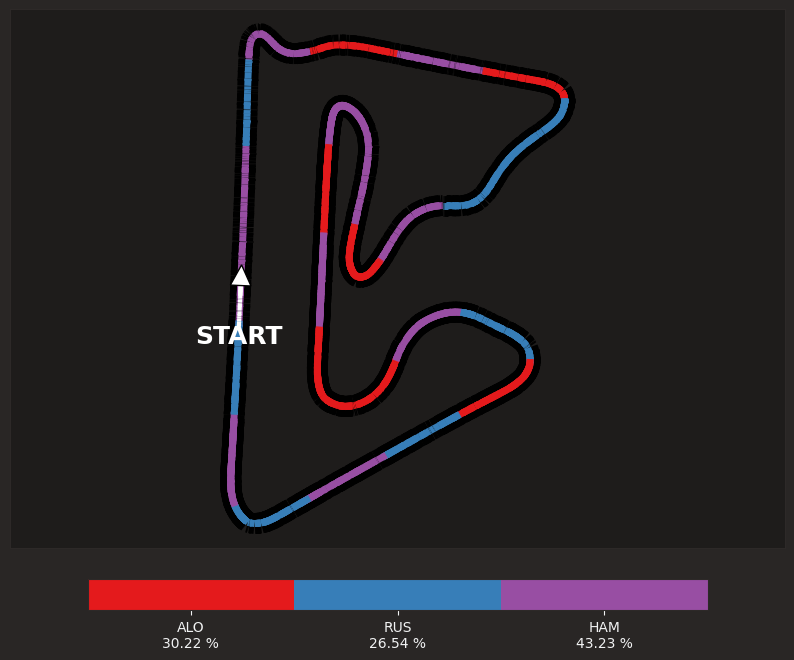

In [39]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments2 = np.concatenate([points[:-1], points[1:]], axis=1)

fastest_driver_array = telemetry['FastestDriverInt'].to_numpy().astype(float)

cmap = cm.get_cmap('Set1', 6)

lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

bg_track = LineCollection(segments)
bg_track.set_linewidth(15)
bg_track.set_color('black')

whiteline = LineCollection(segments[0:30])
whiteline.set_linewidth(3)
whiteline.set_color('white')

plt.rcParams['figure.figsize'] = [10, 10]

plt.gca().add_collection(bg_track)
plt.gca().add_collection(lc_comp)
plt.gca().add_collection(whiteline)

plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.text(x[0], y[0], 'START', fontsize=18, color='white', ha='center', va='top', weight='bold')

slope = (y[0] - y[30]) / (x[0] - x[30])
print(slope)
angle = np.arctan(slope)
angle_degrees = np.degrees(angle)
plt.arrow(x[30], y[30], 0.1 * np.cos(angle), 0.1 * np.sin(angle), head_width=500, head_length=500, fc='white', ec='black', zorder=2)

cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 5), location='bottom', shrink=0.8, anchor=(0.5, 2))
cbar.set_ticks(np.arange(1.5, 4))
cbar.set_ticklabels([f"ALO\n"f"{round(percentage1, 2)} %", f"RUS\n"f"{round(percentage2, 2)} %", f"HAM\n"f"{round(percentage3, 2)} %"])

plt.show()

In [40]:
test = (alo_lap[['LapTime', 'Compound', 'FreshTyre', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife', 'Stint']])
test2 = (rus_lap[['LapTime', 'Compound', 'FreshTyre', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife', 'Stint']])
test3 = (ham_lap[['LapTime', 'Compound', 'FreshTyre', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife', 'Stint']])

print(test)
print(test2)
print(test3)

LapTime        0 days 00:01:30.336000
Compound                         SOFT
FreshTyre                        True
Sector1Time    0 days 00:00:28.852000
Sector2Time    0 days 00:00:38.774000
Sector3Time    0 days 00:00:22.710000
TyreLife                          2.0
Stint                             5.0
dtype: object
LapTime        0 days 00:01:30.340000
Compound                         SOFT
FreshTyre                        True
Sector1Time    0 days 00:00:28.911000
Sector2Time    0 days 00:00:38.870000
Sector3Time    0 days 00:00:22.559000
TyreLife                          2.0
Stint                             5.0
dtype: object
LapTime        0 days 00:01:30.384000
Compound                         SOFT
FreshTyre                        True
Sector1Time    0 days 00:00:28.939000
Sector2Time    0 days 00:00:38.829000
Sector3Time    0 days 00:00:22.616000
TyreLife                          2.0
Stint                             5.0
dtype: object


## Insight: 

- Alonso mendapat waktu tercepat walau hanya menguasai 30.22% bagian dari track. Begitupula dengan russell yang mendapat waktu lebih cepat dari hamilton walau hanya menguasai 26.54% bagian dari track. Hamilton disisi lain menguasai hampir separuh dari track (43.23%)
- S1 = Alo
- S2 = Alo
- S3 = Rus
- Lurusan panjang didominasi oleh Mercedes, Beberapa slow corner dipegang oleh alonso
- Ketiganya memiliki kondisi ban yang sama


# P11 - 15 Battle 

In [ ]:
drivers = ['NOR', 'TSU', 'BOT', 'ALB', 'ZHO']
data_lap = {}
data_car2 = {}
    
for drv in drivers:
    lap = session_q.laps.pick_driver(drv).pick_fastest()
    data_lap[f'{drv.lower()}_lap'] = lap
    data_car2[drv] = lap.get_telemetry().add_distance()


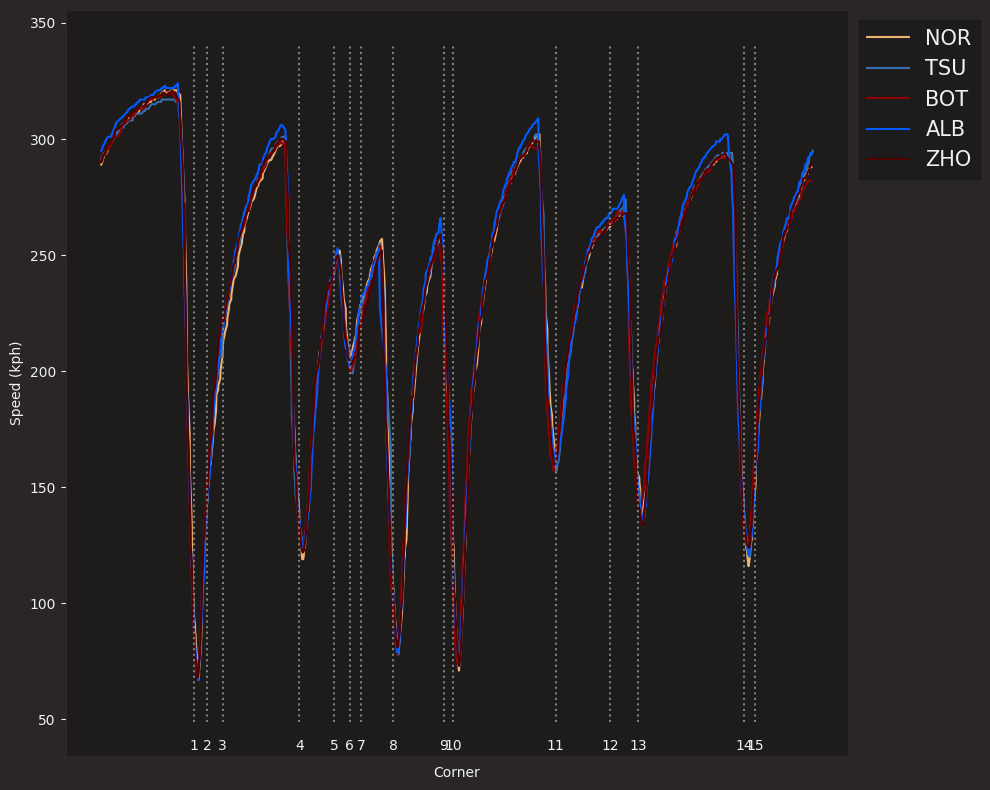

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))

for drv in data_car2.keys():
    ax.plot(data_car2[drv]['Distance'], 
            data_car2[drv]['Speed'], 
            color=fastf1.plotting.driver_color(drv), 
            label=drv, 
            linewidth=1.5)

ax.set_xlabel('Corner')
ax.set_ylabel('Speed (kph)')

v_min = data_car2[random.choice(list(data_car2.keys()))]['Speed'].min()
v_max = data_car2[random.choice(list(data_car2.keys()))]['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center_baseline', ha='center', size='medium')

# plt.grid(which='major', color='grey', axis='both')
plt.xticks([])
plt.minorticks_off()

ax.legend(bbox_to_anchor=(1, 1), fontsize=15)
plt.tight_layout()
plt.show()

## Insight:

- Albon memiliki top speed yang jauh lebih besar ketimbang 4 driver lain
- 4 driver lain tidak memiliki top speed yang berbeda jauh

In [43]:
for drv in drivers:
    data_car2[drv]['Driver'] = drv

In [44]:
telemetry = pd.concat([data_car2['NOR'], data_car2['TSU'], data_car2['BOT'], data_car2['ALB'], data_car2['ZHO']])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2023-03-04 15:47:02.451,0 days 01:02:01.454000,,1055.511667,0 days 00:00:00,10981,289,7,100,False,14,interpolation,0.000011,OnTrack,-378,1274,-157,0.000000,NOR
3,2023-03-04 15:47:02.612,0 days 01:02:01.615000,,1055.511667,0 days 00:00:00.161000,10371,291,7,100,False,14,car,0.002439,OnTrack,-374,1386,-158,13.014167,NOR
4,2023-03-04 15:47:02.658,0 days 01:02:01.661000,,1055.511667,0 days 00:00:00.207000,10398,292,7,100,False,14,pos,0.003137,OnTrack,-373,1422,-159,16.745278,NOR
5,2023-03-04 15:47:02.738,0 days 01:02:01.741000,,1055.511667,0 days 00:00:00.287000,10425,293,7,100,False,14,pos,0.004354,OnTrack,-370,1487,-159,23.256389,NOR
6,2023-03-04 15:47:02.978,0 days 01:02:01.981000,,1055.511667,0 days 00:00:00.527000,10452,294,7,100,False,14,pos,0.008030,OnTrack,-361,1683,-158,42.856389,NOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2023-03-04 15:48:10.933,0 days 01:03:09.936000,27,491.562778,0 days 00:01:30.896000,11452,284,7,100,False,12,car,0.990470,OnTrack,-404,805,-159,5332.353889,ZHO
702,2023-03-04 15:48:11.158,0 days 01:03:10.161000,27,489.673889,0 days 00:01:31.121000,11491,286,7,100,False,12,pos,0.993802,OnTrack,-395,980,-159,5350.228889,ZHO
703,2023-03-04 15:48:11.333,0 days 01:03:10.336000,27,487.785000,0 days 00:01:31.296000,11531,288,7,100,False,12,car,0.996411,OnTrack,-387,1124,-158,5364.228889,ZHO
704,2023-03-04 15:48:11.418,0 days 01:03:10.421000,27,487.785000,0 days 00:01:31.381000,11579,289,7,100,False,12,pos,0.997680,OnTrack,-384,1194,-159,5371.052500,ZHO


In [45]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )

)
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector
2,2023-03-04 15:47:02.451,0 days 01:02:01.454000,,1055.511667,0 days 00:00:00,10981,289,7,100,False,14,interpolation,0.000011,OnTrack,-378,1274,-157,0.000000,NOR,1
3,2023-03-04 15:47:02.612,0 days 01:02:01.615000,,1055.511667,0 days 00:00:00.161000,10371,291,7,100,False,14,car,0.002439,OnTrack,-374,1386,-158,13.014167,NOR,1
4,2023-03-04 15:47:02.658,0 days 01:02:01.661000,,1055.511667,0 days 00:00:00.207000,10398,292,7,100,False,14,pos,0.003137,OnTrack,-373,1422,-159,16.745278,NOR,1
5,2023-03-04 15:47:02.738,0 days 01:02:01.741000,,1055.511667,0 days 00:00:00.287000,10425,293,7,100,False,14,pos,0.004354,OnTrack,-370,1487,-159,23.256389,NOR,1
6,2023-03-04 15:47:02.978,0 days 01:02:01.981000,,1055.511667,0 days 00:00:00.527000,10452,294,7,100,False,14,pos,0.008030,OnTrack,-361,1683,-158,42.856389,NOR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2023-03-04 15:48:10.933,0 days 01:03:09.936000,27,491.562778,0 days 00:01:30.896000,11452,284,7,100,False,12,car,0.990470,OnTrack,-404,805,-159,5332.353889,ZHO,25
702,2023-03-04 15:48:11.158,0 days 01:03:10.161000,27,489.673889,0 days 00:01:31.121000,11491,286,7,100,False,12,pos,0.993802,OnTrack,-395,980,-159,5350.228889,ZHO,25
703,2023-03-04 15:48:11.333,0 days 01:03:10.336000,27,487.785000,0 days 00:01:31.296000,11531,288,7,100,False,12,car,0.996411,OnTrack,-387,1124,-158,5364.228889,ZHO,25
704,2023-03-04 15:48:11.418,0 days 01:03:10.421000,27,487.785000,0 days 00:01:31.381000,11579,289,7,100,False,12,pos,0.997680,OnTrack,-384,1194,-159,5371.052500,ZHO,26


In [46]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,ALB,304.157895
1,1,BOT,299.857143
2,1,NOR,299.950000
3,1,TSU,300.285714
4,1,ZHO,301.000000
...,...,...,...
125,26,ALB,294.000000
126,26,BOT,282.000000
127,26,NOR,288.000000
128,26,TSU,294.500000


In [47]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'FastestDriver'})
fastest_driver

,Minisector,FastestDriver
0,1,ALB
5,2,ALB
12,3,NOR
16,4,BOT
24,5,ZHO
25,6,ALB
30,7,ALB
38,8,TSU
42,9,NOR
47,10,NOR


In [48]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver
0,2023-03-04 15:47:02.451,0 days 01:02:01.454000,,1055.511667,0 days 00:00:00,10981,289,7,100,False,...,interpolation,0.000011,OnTrack,-378,1274,-157,0.000000,NOR,1,ALB
81,2023-03-04 15:46:40.037,0 days 01:01:39.040000,,462.961389,0 days 00:00:00,11285,290,7,100,False,...,interpolation,0.000049,OnTrack,-382,1273,-163,0.000000,ZHO,1,ALB
62,2023-03-04 15:23:26.103,0 days 00:38:25.106000,,1477.703056,0 days 00:00:00,10899,295,8,100,False,...,interpolation,0.000011,OnTrack,-378,1307,-159,0.000000,ALB,1,ALB
41,2023-03-04 15:46:49.364,0 days 01:01:48.367000,,391.790278,0 days 00:00:00,11697,291,7,100,False,...,interpolation,0.000021,OnTrack,-379,1301,-158,0.000000,BOT,1,ALB
20,2023-03-04 15:23:36.246,0 days 00:38:35.249000,,NaN,0 days 00:00:00,11402,291,7,100,False,...,interpolation,0.000020,OnTrack,-380,1275,-159,0.000000,TSU,1,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,2023-03-04 15:48:33.832,0 days 01:03:32.835000,22,878.327222,0 days 00:01:31.381000,11550,288,7,100,False,...,interpolation,0.999091,OnTrack,-374,1356,-158,5373.541667,NOR,26,TSU
3537,2023-03-04 15:24:57.564,0 days 00:39:56.567000,16,171.291111,0 days 00:01:31.461000,10881,294,8,100,False,...,interpolation,0.997484,OnTrack,-381,1257,-158,5376.517778,ALB,26,TSU
3539,2023-03-04 15:48:11.510,0 days 01:03:10.513000,27,487.785000,0 days 00:01:31.473000,11603,289,7,100,False,...,interpolation,0.999056,OnTrack,-380,1267,-159,5378.438056,ZHO,26,TSU
3534,2023-03-04 15:25:07.599,0 days 00:40:06.602000,,NaN,0 days 00:01:31.353000,11729,294,7,100,False,...,pos,0.997380,OnTrack,-381,1272,-159,5379.663611,TSU,26,TSU


In [49]:
# telemetry.loc[telemetry['FastestDriver'] == 'ALO', 'FastestDriverInt'] = 1
# telemetry.loc[telemetry['FastestDriver'] == 'RUS', 'FastestDriverInt'] = 2
# telemetry.loc[telemetry['FastestDriver'] == 'HAM', 'FastestDriverInt'] = 3

for index, drv in enumerate(drivers):
    index += 1
    telemetry.loc[telemetry['FastestDriver'] == drv, 'FastestDriverInt'] = index
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver,FastestDriverInt
0,2023-03-04 15:47:02.451,0 days 01:02:01.454000,,1055.511667,0 days 00:00:00,10981,289,7,100,False,...,0.000011,OnTrack,-378,1274,-157,0.000000,NOR,1,ALB,4.0
81,2023-03-04 15:46:40.037,0 days 01:01:39.040000,,462.961389,0 days 00:00:00,11285,290,7,100,False,...,0.000049,OnTrack,-382,1273,-163,0.000000,ZHO,1,ALB,4.0
62,2023-03-04 15:23:26.103,0 days 00:38:25.106000,,1477.703056,0 days 00:00:00,10899,295,8,100,False,...,0.000011,OnTrack,-378,1307,-159,0.000000,ALB,1,ALB,4.0
41,2023-03-04 15:46:49.364,0 days 01:01:48.367000,,391.790278,0 days 00:00:00,11697,291,7,100,False,...,0.000021,OnTrack,-379,1301,-158,0.000000,BOT,1,ALB,4.0
20,2023-03-04 15:23:36.246,0 days 00:38:35.249000,,NaN,0 days 00:00:00,11402,291,7,100,False,...,0.000020,OnTrack,-380,1275,-159,0.000000,TSU,1,ALB,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,2023-03-04 15:48:33.832,0 days 01:03:32.835000,22,878.327222,0 days 00:01:31.381000,11550,288,7,100,False,...,0.999091,OnTrack,-374,1356,-158,5373.541667,NOR,26,TSU,2.0
3537,2023-03-04 15:24:57.564,0 days 00:39:56.567000,16,171.291111,0 days 00:01:31.461000,10881,294,8,100,False,...,0.997484,OnTrack,-381,1257,-158,5376.517778,ALB,26,TSU,2.0
3539,2023-03-04 15:48:11.510,0 days 01:03:10.513000,27,487.785000,0 days 00:01:31.473000,11603,289,7,100,False,...,0.999056,OnTrack,-380,1267,-159,5378.438056,ZHO,26,TSU,2.0
3534,2023-03-04 15:25:07.599,0 days 00:40:06.602000,,NaN,0 days 00:01:31.353000,11729,294,7,100,False,...,0.997380,OnTrack,-381,1272,-159,5379.663611,TSU,26,TSU,2.0


In [50]:
percentage_values = {}
total_rows = len(telemetry)
for index, drv in enumerate(drivers):
    index +=1
    condition = telemetry['FastestDriverInt'] == index
    count = len(telemetry[condition])
    percentage = (count/total_rows)*100
    percentage_values[f"{drv}"] = percentage
    
percentage_values

{'NOR': 20.480225988700564,
 'TSU': 9.03954802259887,
 'BOT': 23.333333333333332,
 'ALB': 31.610169491525426,
 'ZHO': 15.53672316384181}

23.476190476190474


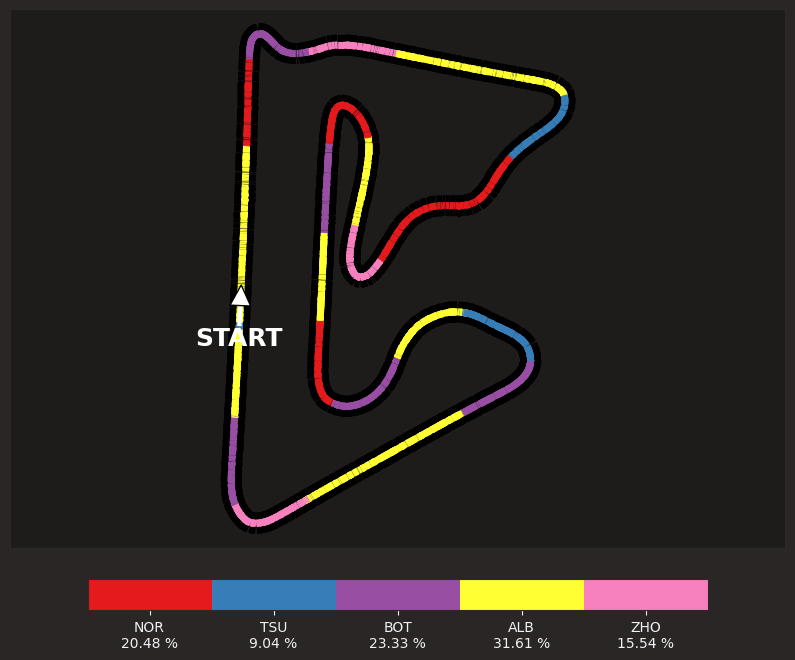

In [51]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments2 = np.concatenate([points[:-1], points[1:]], axis=1)

fastest_driver_array = telemetry['FastestDriverInt'].to_numpy().astype(float)

cmap = cm.get_cmap('Set1', 6)

lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

bg_track = LineCollection(segments)
bg_track.set_linewidth(15)
bg_track.set_color('black')

whiteline = LineCollection(segments[0:30])
whiteline.set_linewidth(3)
whiteline.set_color('white')

plt.rcParams['figure.figsize'] = [10, 10]

plt.gca().add_collection(bg_track)
plt.gca().add_collection(lc_comp)
plt.gca().add_collection(whiteline)

plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.text(x[0], y[0], 'START', fontsize=18, color='white', ha='center', va='top', weight='bold')

slope = (y[0] - y[30]) / (x[0] - x[30])
print(slope)
angle = np.arctan(slope)
angle_degrees = np.degrees(angle)
plt.arrow(x[30], y[30], 0.1 * np.cos(angle), 0.1 * np.sin(angle), head_width=500, head_length=500, fc='white', ec='black', zorder=2)

cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 7), location='bottom', shrink=0.8, anchor=(0.5, 2))
cbar.set_ticks(np.arange(1.5, 6.5))
cbar.set_ticklabels([f"NOR\n"f"{round(percentage_values['NOR'], 2)} %", 
                     f"TSU\n"f"{round(percentage_values['TSU'], 2)} %", 
                     f"BOT\n"f"{round(percentage_values['BOT'], 2)} %",
                     f"ALB\n"f"{round(percentage_values['ALB'], 2)} %",
                     f"ZHO\n"f"{round(percentage_values['ZHO'], 2)} %"])

plt.show()

In [52]:
data = {
    'NOR': data_lap['nor_lap'][['LapTime', 'Compound', 'FreshTyre', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife', 'Stint']],
    'TSU': data_lap['tsu_lap'][['LapTime', 'Compound', 'FreshTyre', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife', 'Stint']],
    'BOT': data_lap['bot_lap'][['LapTime', 'Compound', 'FreshTyre', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife', 'Stint']],
    'ALB': data_lap['alb_lap'][['LapTime', 'Compound', 'FreshTyre', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife', 'Stint']],
    'ZHO': data_lap['zho_lap'][['LapTime', 'Compound', 'FreshTyre', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife', 'Stint']]
}

merged_df = pd.concat(data, axis=1)
# merged_df.reset_index(drop=True, inplace=True)
merged_df

,NOR,TSU,BOT,ALB,ZHO
LapTime,0 days 00:01:31.381000,0 days 00:01:31.400000,0 days 00:01:31.443000,0 days 00:01:31.461000,0 days 00:01:31.473000
Compound,SOFT,SOFT,SOFT,SOFT,SOFT
FreshTyre,True,True,False,True,True
Sector1Time,0 days 00:00:29.235000,0 days 00:00:29.242000,0 days 00:00:29.235000,0 days 00:00:29.250000,0 days 00:00:29.041000
Sector2Time,0 days 00:00:39.210000,0 days 00:00:39.229000,0 days 00:00:39.327000,0 days 00:00:39.224000,0 days 00:00:39.427000
Sector3Time,0 days 00:00:22.936000,0 days 00:00:22.929000,0 days 00:00:22.881000,0 days 00:00:22.987000,0 days 00:00:23.005000
TyreLife,2.0,2.0,5.0,2.0,2.0
Stint,5.0,3.0,4.0,2.0,4.0


## Insight:

- Lurusan panjang dikuasai albon
- Exit slow corner dikuasai bottas
- Bottas memiliki waktu yang lebih cepat dari Zhou walaupun memiliki ban yang tidak fresh
- Waktu tsunoda dan albon diambil dari Q1, karena pada saat Q2 mereka mendapat waktu yang rendah sehingga berada di posisi 14 dan 15 dan norris bottas zhou masing masing mendapat posisi P11 - 13
- S1 : Zhou
- S2 : Nor
- S3 : Bot

# Race Day!

In [53]:
column_names = list(session_r.results)
print(column_names)

['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName', 'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName', 'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points']


In [54]:
# session_r.results[['Abbreviation', 'Position', 'ClassifiedPosition', 'GridPosition']]
# {strftimedelta(lap_time_deltas[i], '%s.%ms')}


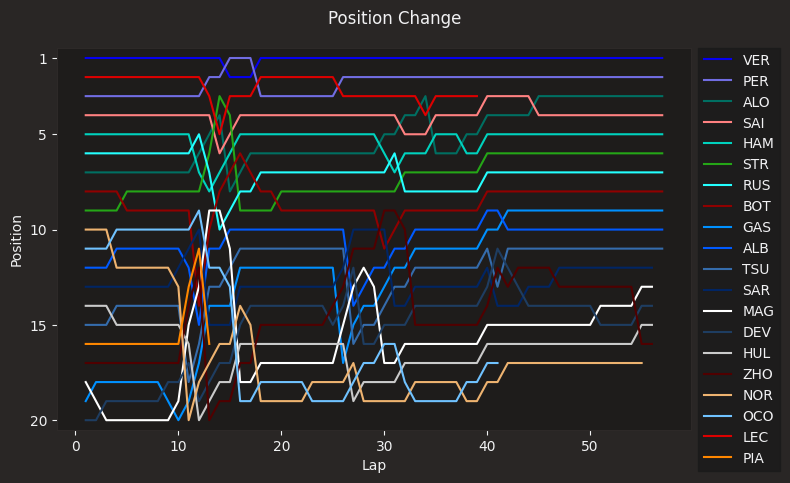

In [55]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in session_r.drivers:
    drv_laps = session_r.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)
    
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

plt.suptitle('Position Change')
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.show()

## Ver vs Per vs Lec (before DNF)

In [56]:
ver_laps = session_r.laps.pick_driver('VER').pick_quicklaps().reset_index()
per_laps = session_r.laps.pick_driver('PER').pick_quicklaps().reset_index()
lec_laps = session_r.laps.pick_driver('LEC').pick_quicklaps().reset_index()

In [57]:
lec_lapss = session_r.laps.pick_driver('LEC').reset_index()
ver_lapss = session_r.laps.pick_driver('VER').reset_index()
per_lapss = session_r.laps.pick_driver('PER').reset_index()

In [58]:
pit_time = session_r.laps[['Compound', 'Stint', 'LapNumber', 'Driver', 'PitInTime', 'LapTime', 'Position']]
a = pit_time.loc[(pd.notna(pit_time['PitInTime'])) & (pit_time['Driver'] == 'VER' )]
b = pit_time.loc[(pd.notna(pit_time['PitInTime'])) & (pit_time['Driver'] == 'PER' )]
c = pit_time.loc[(pd.notna(pit_time['PitInTime'])) & (pit_time['Driver'] == 'LEC' )]
e = pd.concat([a, b, c])
e

,Compound,Stint,LapNumber,Driver,PitInTime,LapTime,Position
13,SOFT,1.0,14.0,VER,0 days 01:25:33.830000,0 days 00:01:41.295000,1.0
35,SOFT,2.0,36.0,VER,0 days 02:01:45.619000,0 days 00:01:40.964000,1.0
130,SOFT,1.0,17.0,PER,0 days 01:30:41.043000,0 days 00:01:41.360000,1.0
147,SOFT,2.0,34.0,PER,0 days 01:58:43.794000,0 days 00:01:40.686000,2.0
240,SOFT,1.0,13.0,LEC,0 days 01:24:04.832000,0 days 00:01:42.068000,3.0
260,HARD,2.0,33.0,LEC,0 days 01:57:14.968000,0 days 00:01:41.323000,3.0


In [59]:
lec = pit_time.loc[(pit_time['Driver'] == 'LEC' )]
lec

,Compound,Stint,LapNumber,Driver,PitInTime,LapTime,Position
228,SOFT,1.0,1.0,LEC,NaT,0 days 00:01:40.230000,2.0
229,SOFT,1.0,2.0,LEC,NaT,0 days 00:01:38.750000,2.0
230,SOFT,1.0,3.0,LEC,NaT,0 days 00:01:38.658000,2.0
231,SOFT,1.0,4.0,LEC,NaT,0 days 00:01:38.825000,2.0
232,SOFT,1.0,5.0,LEC,NaT,0 days 00:01:38.664000,2.0
233,SOFT,1.0,6.0,LEC,NaT,0 days 00:01:38.572000,2.0
234,SOFT,1.0,7.0,LEC,NaT,0 days 00:01:38.691000,2.0
235,SOFT,1.0,8.0,LEC,NaT,0 days 00:01:38.614000,2.0
236,SOFT,1.0,9.0,LEC,NaT,0 days 00:01:38.828000,2.0
237,SOFT,1.0,10.0,LEC,NaT,0 days 00:01:39.073000,2.0


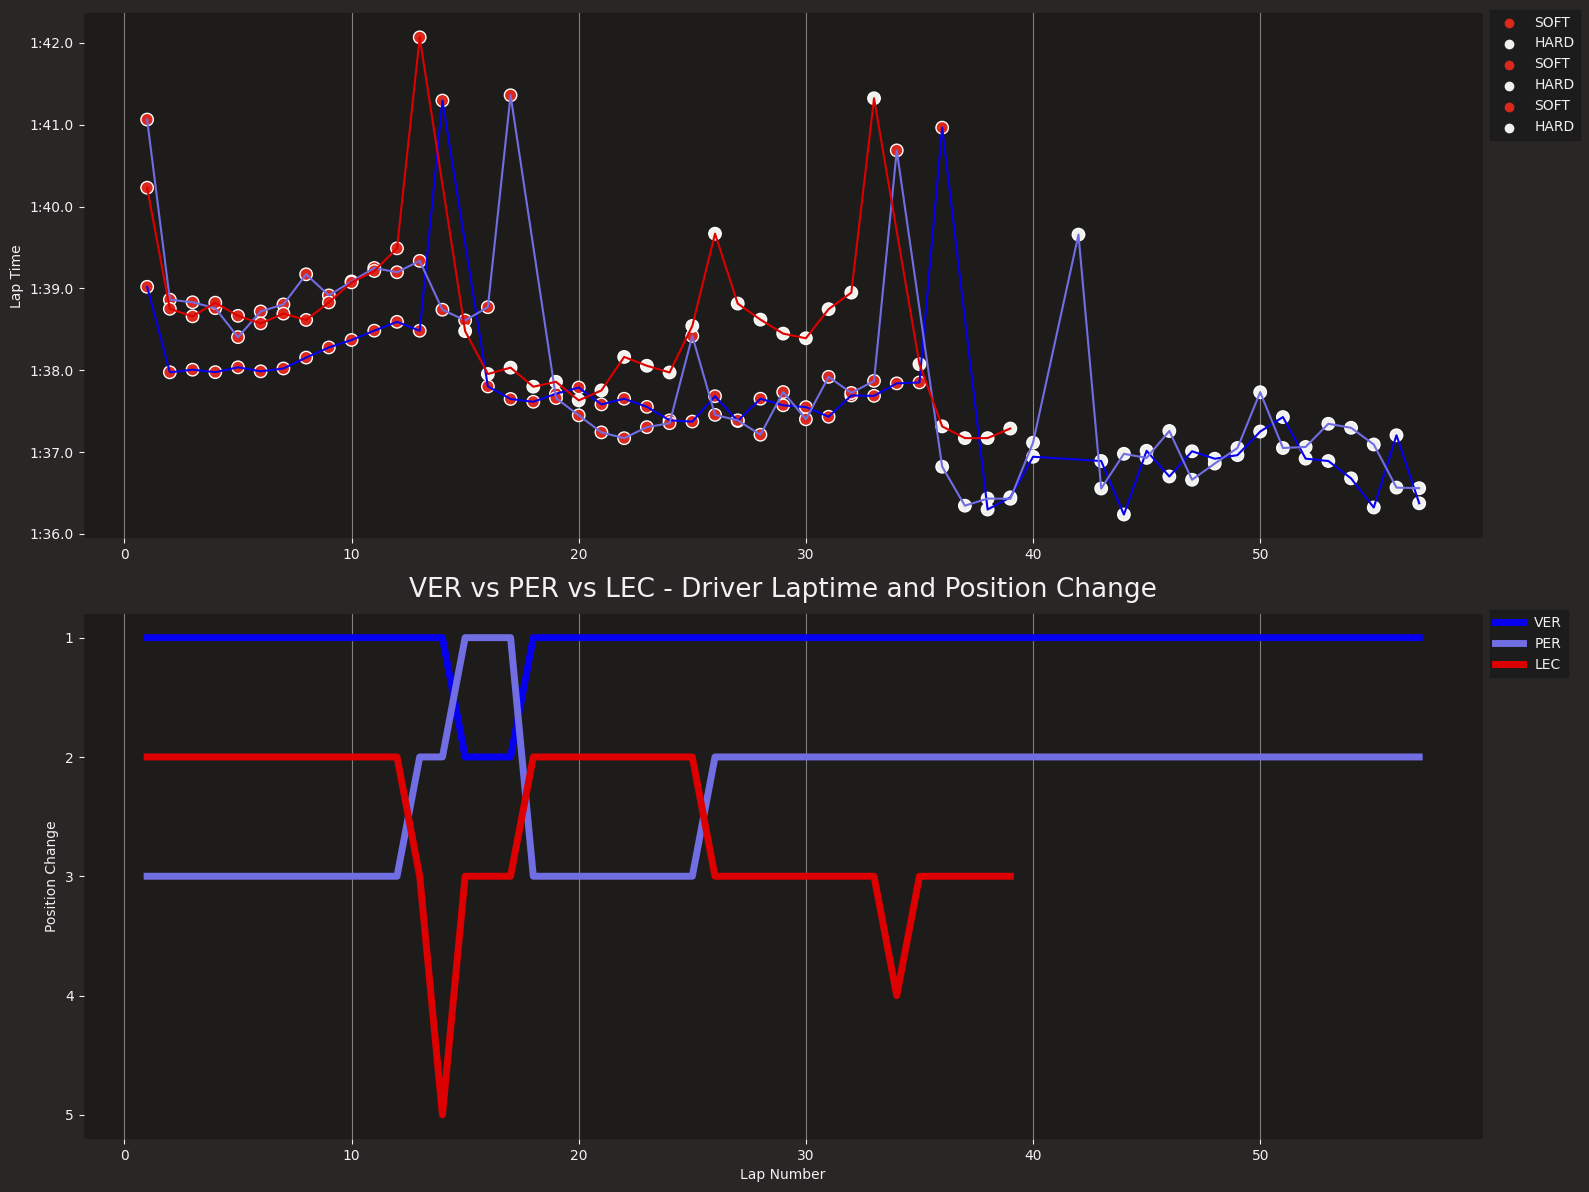

In [73]:
#### import seaborn as sns
fig, ax= plt.subplots(2, 1, figsize=(16,12))

sns.scatterplot(data=ver_laps, 
                x='LapNumber', 
                y='LapTime', 
                ax=ax[0], 
                hue='Compound', 
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=1)
sns.scatterplot(data=per_laps, 
                x='LapNumber', 
                y='LapTime', 
                ax=ax[0], 
                hue='Compound', 
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=1)
sns.scatterplot(data=lec_laps, 
                x='LapNumber', 
                y='LapTime', 
                ax=ax[0], 
                hue='Compound', 
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=1)
sns.lineplot(data=ver_laps,
             x='LapNumber',
             y='LapTime',
             ax=ax[0],
             color=fastf1.plotting.driver_color('VER')
            )
sns.lineplot(data=per_laps,
             x='LapNumber',
             y='LapTime',
             ax=ax[0],
             color=fastf1.plotting.driver_color('PER')
            )
sns.lineplot(data=lec_laps,
             x='LapNumber',
             y='LapTime',
             ax=ax[0],
             color=fastf1.plotting.driver_color('LEC')
            )

ax[1].plot(ver_lapss['LapNumber'], ver_lapss['Position'],
            label='VER', color=fastf1.plotting.driver_color('VER'), linewidth=5)
ax[1].plot(per_lapss['LapNumber'], per_lapss['Position'],
            label='PER', color=fastf1.plotting.driver_color('PER'), linewidth=5)
ax[1].plot(lec_lapss['LapNumber'], lec_lapss['Position'],
            label='LEC', color=fastf1.plotting.driver_color('LEC'), linewidth=5)

ax[0].invert_yaxis()
ax[0].set_xlabel('')
ax[0].set_ylabel('Lap Time')

ax[1].invert_yaxis()
ax[1].set_xlabel('Lap Number')
ax[1].set_ylabel('Position Change')
ax[1].set_yticks(np.arange(1, 6, step=1))

plt.title('VER vs PER vs LEC - Driver Laptime and Position Change')
ax[0].grid(color='grey', which='major', axis='x')
ax[1].grid(color='grey', which='major', axis='x')
sns.despine(left=True, bottom=True)

ax[0].legend(loc='upper left', bbox_to_anchor=(1.0, 1.02))
ax[1].legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.show()

## Insight:

- Perez turun ke posisi 3 di lap 1
- Verstappen push mobilnya di stint awal balapan, hingga berjarak 1 detik tiap lapnya dengan P2 dan P3
- Leclerc melakukan undercut di lap 13 untuk mengganti ke ban hard
- Verstappen melakukan pit di lap 14 ganti ke soft, turun ke P2 karena perez mencoba untuk overcut
- Perez melakukan overcut dengan menahan hingga lap 17 dan gagal
- Perez turun ke P3 karena Leclerc berhasil melakukan undercut dan naik ke P2
- Verstappen kembali ke P1 dengan catatan waktu lebih cepat ketimbang perez dan leclerc dari lap 14 hingga lap 17
- ban hard leclerc justru memiliki performa kurang baik ketimbang ban soft milik perez dan akhirnya kembali disalip oleh perez
- leclerc kembali mencoba undercut di lap 33 dengan mengganti ke ban hard baru, namun mobilnya keburu kena engine failure dan DNF
- Perez dan verstappen masing masing pit di lap 34 dan 36 untuk mengganti ke ban hard, posisi mobil tetap sama hingga akhir balapan

## Team Race Pace

In [61]:
laps = session_r.laps.pick_quicklaps()
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:15.961000,VER,1,0 days 00:01:39.019000,1.0,1.0,0 days 00:21:57.509000,NaT,NaT,0 days 00:00:42.414000,...,False,Red Bull Racing,0 days 01:02:36.652000,2023-03-05 15:03:38.501,2,1.0,False,,False,False
1,0 days 01:05:53.935000,VER,1,0 days 00:01:37.974000,2.0,1.0,NaT,NaT,0 days 00:00:31.342000,0 days 00:00:42.504000,...,False,Red Bull Racing,0 days 01:04:15.961000,2023-03-05 15:05:17.810,2,1.0,False,,False,True
2,0 days 01:07:31.941000,VER,1,0 days 00:01:38.006000,3.0,1.0,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.469000,...,False,Red Bull Racing,0 days 01:05:53.935000,2023-03-05 15:06:55.784,1,1.0,False,,False,True
3,0 days 01:09:09.917000,VER,1,0 days 00:01:37.976000,4.0,1.0,NaT,NaT,0 days 00:00:31.271000,0 days 00:00:42.642000,...,False,Red Bull Racing,0 days 01:07:31.941000,2023-03-05 15:08:33.790,1,1.0,False,,False,True
4,0 days 01:10:47.952000,VER,1,0 days 00:01:38.035000,5.0,1.0,NaT,NaT,0 days 00:00:31.244000,0 days 00:00:42.724000,...,False,Red Bull Racing,0 days 01:09:09.917000,2023-03-05 15:10:11.766,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0 days 02:31:14.213000,BOT,77,0 days 00:01:37.856000,53.0,3.0,NaT,NaT,0 days 00:00:31.458000,0 days 00:00:42.413000,...,True,Alfa Romeo,0 days 02:29:36.357000,2023-03-05 16:30:38.206,1,8.0,False,,False,True
1039,0 days 02:32:51.951000,BOT,77,0 days 00:01:37.738000,54.0,3.0,NaT,NaT,0 days 00:00:31.461000,0 days 00:00:42.300000,...,True,Alfa Romeo,0 days 02:31:14.213000,2023-03-05 16:32:16.062,1,8.0,False,,False,True
1040,0 days 02:34:29.758000,BOT,77,0 days 00:01:37.807000,55.0,3.0,NaT,NaT,0 days 00:00:31.526000,0 days 00:00:42.257000,...,True,Alfa Romeo,0 days 02:32:51.951000,2023-03-05 16:33:53.800,1,8.0,False,,False,True
1041,0 days 02:36:07.918000,BOT,77,0 days 00:01:38.160000,56.0,3.0,NaT,NaT,0 days 00:00:31.687000,0 days 00:00:42.384000,...,True,Alfa Romeo,0 days 02:34:29.758000,2023-03-05 16:35:31.607,1,8.0,False,,False,True


In [62]:
transformed_laps = laps.copy()
transformed_laps.loc[:,'LapTime (s)'] = laps['LapTime'].dt.total_seconds()

print(transformed_laps.loc[:,'LapTime (s)'])
transformed_laps

0       99.019
1       97.974
2       98.006
3       97.976
4       98.035
         ...  
1038    97.856
1039    97.738
1040    97.807
1041    98.160
1042    98.407
Name: LapTime (s), Length: 826, dtype: float64


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime (s)
0,0 days 01:04:15.961000,VER,1,0 days 00:01:39.019000,1.0,1.0,0 days 00:21:57.509000,NaT,NaT,0 days 00:00:42.414000,...,Red Bull Racing,0 days 01:02:36.652000,2023-03-05 15:03:38.501,2,1.0,False,,False,False,99.019
1,0 days 01:05:53.935000,VER,1,0 days 00:01:37.974000,2.0,1.0,NaT,NaT,0 days 00:00:31.342000,0 days 00:00:42.504000,...,Red Bull Racing,0 days 01:04:15.961000,2023-03-05 15:05:17.810,2,1.0,False,,False,True,97.974
2,0 days 01:07:31.941000,VER,1,0 days 00:01:38.006000,3.0,1.0,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.469000,...,Red Bull Racing,0 days 01:05:53.935000,2023-03-05 15:06:55.784,1,1.0,False,,False,True,98.006
3,0 days 01:09:09.917000,VER,1,0 days 00:01:37.976000,4.0,1.0,NaT,NaT,0 days 00:00:31.271000,0 days 00:00:42.642000,...,Red Bull Racing,0 days 01:07:31.941000,2023-03-05 15:08:33.790,1,1.0,False,,False,True,97.976
4,0 days 01:10:47.952000,VER,1,0 days 00:01:38.035000,5.0,1.0,NaT,NaT,0 days 00:00:31.244000,0 days 00:00:42.724000,...,Red Bull Racing,0 days 01:09:09.917000,2023-03-05 15:10:11.766,1,1.0,False,,False,True,98.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0 days 02:31:14.213000,BOT,77,0 days 00:01:37.856000,53.0,3.0,NaT,NaT,0 days 00:00:31.458000,0 days 00:00:42.413000,...,Alfa Romeo,0 days 02:29:36.357000,2023-03-05 16:30:38.206,1,8.0,False,,False,True,97.856
1039,0 days 02:32:51.951000,BOT,77,0 days 00:01:37.738000,54.0,3.0,NaT,NaT,0 days 00:00:31.461000,0 days 00:00:42.300000,...,Alfa Romeo,0 days 02:31:14.213000,2023-03-05 16:32:16.062,1,8.0,False,,False,True,97.738
1040,0 days 02:34:29.758000,BOT,77,0 days 00:01:37.807000,55.0,3.0,NaT,NaT,0 days 00:00:31.526000,0 days 00:00:42.257000,...,Alfa Romeo,0 days 02:32:51.951000,2023-03-05 16:33:53.800,1,8.0,False,,False,True,97.807
1041,0 days 02:36:07.918000,BOT,77,0 days 00:01:38.160000,56.0,3.0,NaT,NaT,0 days 00:00:31.687000,0 days 00:00:42.384000,...,Alfa Romeo,0 days 02:34:29.758000,2023-03-05 16:35:31.607,1,8.0,False,,False,True,98.160


In [63]:
team_order = (transformed_laps[['Team', 'LapTime (s)']]
              .groupby('Team')
              .median()['LapTime (s)']
              .sort_values()
              .index)
print(team_order)

team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}
print(team_palette)

Index(['Red Bull Racing', 'Aston Martin', 'Williams', 'Haas F1 Team',
       'Mercedes', 'McLaren', 'Ferrari', 'Alfa Romeo', 'Alpine', 'AlphaTauri'],
      dtype='object', name='Team')
{'Red Bull Racing': '#0600ef', 'Aston Martin': '#006f62', 'Williams': '#005aff', 'Haas F1 Team': '#ffffff', 'Mercedes': '#00d2be', 'McLaren': '#ff8700', 'Ferrari': '#dc0000', 'Alfa Romeo': '#900000', 'Alpine': '#0090ff', 'AlphaTauri': '#2b4562'}


In [64]:
transformed_laps = transformed_laps.loc[transformed_laps['LapTime (s)'] >= 95]
transformed_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime (s)
0,0 days 01:04:15.961000,VER,1,0 days 00:01:39.019000,1.0,1.0,0 days 00:21:57.509000,NaT,NaT,0 days 00:00:42.414000,...,Red Bull Racing,0 days 01:02:36.652000,2023-03-05 15:03:38.501,2,1.0,False,,False,False,99.019
1,0 days 01:05:53.935000,VER,1,0 days 00:01:37.974000,2.0,1.0,NaT,NaT,0 days 00:00:31.342000,0 days 00:00:42.504000,...,Red Bull Racing,0 days 01:04:15.961000,2023-03-05 15:05:17.810,2,1.0,False,,False,True,97.974
2,0 days 01:07:31.941000,VER,1,0 days 00:01:38.006000,3.0,1.0,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.469000,...,Red Bull Racing,0 days 01:05:53.935000,2023-03-05 15:06:55.784,1,1.0,False,,False,True,98.006
3,0 days 01:09:09.917000,VER,1,0 days 00:01:37.976000,4.0,1.0,NaT,NaT,0 days 00:00:31.271000,0 days 00:00:42.642000,...,Red Bull Racing,0 days 01:07:31.941000,2023-03-05 15:08:33.790,1,1.0,False,,False,True,97.976
4,0 days 01:10:47.952000,VER,1,0 days 00:01:38.035000,5.0,1.0,NaT,NaT,0 days 00:00:31.244000,0 days 00:00:42.724000,...,Red Bull Racing,0 days 01:09:09.917000,2023-03-05 15:10:11.766,1,1.0,False,,False,True,98.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0 days 02:31:14.213000,BOT,77,0 days 00:01:37.856000,53.0,3.0,NaT,NaT,0 days 00:00:31.458000,0 days 00:00:42.413000,...,Alfa Romeo,0 days 02:29:36.357000,2023-03-05 16:30:38.206,1,8.0,False,,False,True,97.856
1039,0 days 02:32:51.951000,BOT,77,0 days 00:01:37.738000,54.0,3.0,NaT,NaT,0 days 00:00:31.461000,0 days 00:00:42.300000,...,Alfa Romeo,0 days 02:31:14.213000,2023-03-05 16:32:16.062,1,8.0,False,,False,True,97.738
1040,0 days 02:34:29.758000,BOT,77,0 days 00:01:37.807000,55.0,3.0,NaT,NaT,0 days 00:00:31.526000,0 days 00:00:42.257000,...,Alfa Romeo,0 days 02:32:51.951000,2023-03-05 16:33:53.800,1,8.0,False,,False,True,97.807
1041,0 days 02:36:07.918000,BOT,77,0 days 00:01:38.160000,56.0,3.0,NaT,NaT,0 days 00:00:31.687000,0 days 00:00:42.384000,...,Alfa Romeo,0 days 02:34:29.758000,2023-03-05 16:35:31.607,1,8.0,False,,False,True,98.160


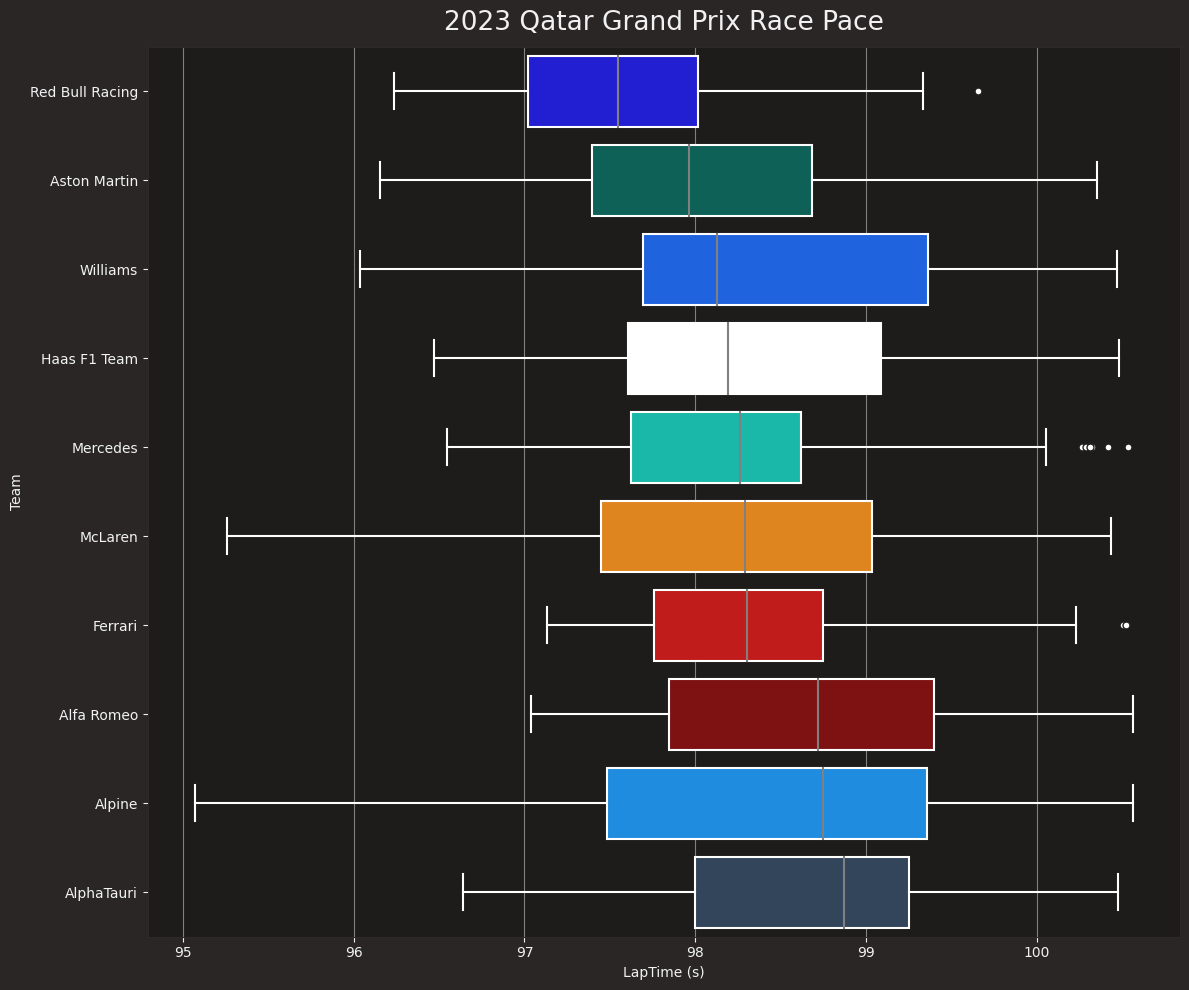

In [65]:
fig, ax = plt.subplots(figsize=(12, 10))
outlier_props = dict(markerfacecolor='white', marker='o')

bxp = sns.boxplot(data=transformed_laps,
             x='LapTime (s)',
             y='Team',
             order=team_order,
             palette=team_palette,
             whiskerprops=dict(color='white'),
             boxprops=dict(edgecolor='white'),
             medianprops=dict(color='grey'),
             capprops=dict(color='white'),
             flierprops=outlier_props 
            )

plt.title('2023 Qatar Grand Prix Race Pace')
plt.grid(color='grey', which='major', axis='x')

plt.tight_layout()
plt.show()

In [66]:
data_list = []
i=0
for index in team_order:
    q1 = bxp.findobj(plt.Line2D)[i+0].get_xdata()[0]
    q3 = bxp.findobj(plt.Line2D)[i+1].get_xdata()[0]
    _min = bxp.findobj(plt.Line2D)[i+2].get_xdata()[0]
    _max = bxp.findobj(plt.Line2D)[i+3].get_xdata()[0]
    med = bxp.findobj(plt.Line2D)[i+4].get_xdata()[0]
    mean = transformed_laps.loc[transformed_laps['Team'] == index]['LapTime (s)'].mean()
    i+=6
    
    team_data = {
        'Team': index,
        'Q1': q1,
        'Q3': q3,
        'Min': _min,
        'Max': _max,
        'Median': med,
        'Mean': mean
    }
    
    data_list.append(team_data)
    
df = pd.DataFrame(data_list)
df['IQR'] = df['Q3']-df['Q1']
df['Range'] = df['Max']-df['Min']
df['Skewness'] = 'Negative'
df.loc[(df['Mean'] > df['Median']), 'Skewness'] = 'Positive'
df = df.sort_values(by='IQR')
df

,Team,Q1,Q3,Min,Max,Median,Mean,IQR,Range,Skewness
6,Ferrari,97.75600,98.74900,97.130,100.230,98.3005,98.361523,0.99300,3.100,Positive
0,Red Bull Racing,97.02350,98.01725,96.236,99.336,97.5505,97.615686,0.99375,3.100,Positive
4,Mercedes,97.62150,98.62100,96.546,100.056,98.2650,98.290475,0.99950,3.510,Positive
9,AlphaTauri,97.99900,99.24975,96.637,100.475,98.8695,98.675119,1.25075,3.838,Negative
1,Aston Martin,97.39650,98.68550,96.156,100.353,97.9610,98.154163,1.28900,4.197,Positive
3,Haas F1 Team,97.60700,99.08600,96.471,100.484,98.1910,98.326052,1.47900,4.013,Positive
7,Alfa Romeo,97.84500,99.40075,97.037,100.564,98.7160,98.718690,1.55575,3.527,Positive
5,McLaren,97.44950,99.03700,95.257,100.433,98.2940,98.193211,1.58750,5.176,Negative
2,Williams,97.69500,99.36200,96.037,100.467,98.1270,98.452694,1.66700,4.430,Positive
8,Alpine,97.48325,99.35725,95.068,100.562,98.7455,98.387292,1.87400,5.494,Negative


## Insight:

- Red bull memiliki average race pace terbaik dengan median di 97.5505 dengan mean 97.615686
- alpha tauri memiliki average race pace terburuk dengan mean di 98.675119, namun memiliki konsistensi 50% race pace terbaik ke 2 dengan IQR 1.25075
- Alpine walaupun memiliki minimum race pace terbaik, tetapi memiliki race pace paling tidak konsisten dengan persebaran data antara Q3 dan Q1 (IQR) terbesar yaitu 1.87400 dan juga range terbesar di angka 5.494
- Begitupula dengan mclaren yang memiliki range terbesar kedua di angka 5.176, tetapi mclaren tidak memiliki IQR sebesar milik Alpine
- Konsistensi race pace dipegang oleh 3 team dengan IQR dibawah 1, yaitu Ferrari (0.99375), Red Bull (0.99375), dan Mercedes (0.99950), selebihnya memiliki IQR diatas 1 dengan IQR ke 4 dipegang oleh aston martin (1.28900)
- Aston martin memiliki average race pace terbaik kedua dibawah redbull, namun tidak konsisten apabila dibandingkan dengan konsistensi red bull

In [67]:
session_r.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,,1.0,1,1.0,NaT,NaT,NaT,0 days 01:33:56.736000,Finished,25.0
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,,2.0,2,2.0,NaT,NaT,NaT,0 days 00:00:11.987000,Finished,18.0
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,,3.0,3,5.0,NaT,NaT,NaT,0 days 00:00:38.637000,Finished,15.0
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,,4.0,4,4.0,NaT,NaT,NaT,0 days 00:00:48.052000,Finished,12.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,,5.0,5,7.0,NaT,NaT,NaT,0 days 00:00:50.977000,Finished,10.0
18,18,L STROLL,STR,stroll,Aston Martin,358C75,aston_martin,Lance,Stroll,Lance Stroll,...,,6.0,6,8.0,NaT,NaT,NaT,0 days 00:00:54.502000,Finished,8.0
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,,7.0,7,6.0,NaT,NaT,NaT,0 days 00:00:55.873000,Finished,6.0
77,77,V BOTTAS,BOT,bottas,Alfa Romeo,C92D4B,alfa,Valtteri,Bottas,Valtteri Bottas,...,,8.0,8,12.0,NaT,NaT,NaT,0 days 00:01:12.647000,Finished,4.0
10,10,P GASLY,GAS,gasly,Alpine,2293D1,alpine,Pierre,Gasly,Pierre Gasly,...,,9.0,9,20.0,NaT,NaT,NaT,0 days 00:01:13.753000,Finished,2.0
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,,10.0,10,15.0,NaT,NaT,NaT,0 days 00:01:29.774000,Finished,1.0


In [68]:
results = session_q.results[['FullName', 'Q3', 'Q2', 'Q1']]
results

,FullName,Q3,Q2,Q1
1,Max Verstappen,0 days 00:01:29.708000,0 days 00:01:30.503000,0 days 00:01:31.295000
11,Sergio Perez,0 days 00:01:29.846000,0 days 00:01:30.746000,0 days 00:01:31.479000
16,Charles Leclerc,0 days 00:01:30,0 days 00:01:30.282000,0 days 00:01:31.094000
55,Carlos Sainz,0 days 00:01:30.154000,0 days 00:01:30.515000,0 days 00:01:30.993000
14,Fernando Alonso,0 days 00:01:30.336000,0 days 00:01:30.645000,0 days 00:01:31.158000
63,George Russell,0 days 00:01:30.340000,0 days 00:01:30.507000,0 days 00:01:31.057000
44,Lewis Hamilton,0 days 00:01:30.384000,0 days 00:01:30.513000,0 days 00:01:31.543000
18,Lance Stroll,0 days 00:01:30.836000,0 days 00:01:31.127000,0 days 00:01:31.184000
31,Esteban Ocon,0 days 00:01:30.984000,0 days 00:01:30.914000,0 days 00:01:31.508000
27,Nico Hulkenberg,NaT,0 days 00:01:30.809000,0 days 00:01:31.204000


In [69]:
ergast = Ergast()
standings = ergast.get_constructor_standings(season=2023, round=1)
standings.content[0]

,position,positionText,points,wins,constructorId,constructorUrl,constructorName,constructorNationality
0,1,1,43.0,1,red_bull,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian
1,2,2,23.0,0,aston_martin,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,Aston Martin,British
2,3,3,16.0,0,mercedes,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Mercedes,German
3,4,4,12.0,0,ferrari,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Ferrari,Italian
4,5,5,4.0,0,alfa,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Alfa Romeo,Swiss
5,6,6,2.0,0,alpine,http://en.wikipedia.org/wiki/Alpine_F1_Team,Alpine F1 Team,French
6,7,7,1.0,0,williams,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Williams,British
7,8,8,0.0,0,alphatauri,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,AlphaTauri,Italian
8,9,9,0.0,0,haas,http://en.wikipedia.org/wiki/Haas_F1_Team,Haas F1 Team,American
9,10,10,0.0,0,mclaren,http://en.wikipedia.org/wiki/McLaren,McLaren,British
